/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(



Test accuracy: 0.9757857142857143


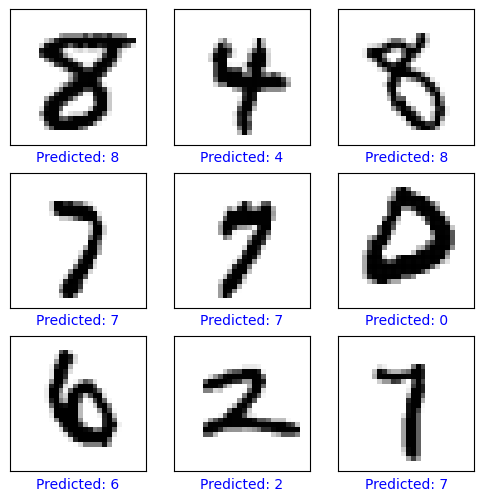

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_test and y_test to NumPy arrays to avoid indexing issues
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Initialize and train the neural network model
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=20, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy: {accuracy}')

# Function to plot image and prediction
def plot_image(i, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {y_pred[i]}", color='blue')

# Display sample predictions
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_test[i], X_test[i])
plt.show()


Lab 01

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8706 - loss: 0.4399 - val_accuracy: 0.9687 - val_loss: 0.1044
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9675 - loss: 0.1080 - val_accuracy: 0.9680 - val_loss: 0.1027
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9770 - loss: 0.0750 - val_accuracy: 0.9775 - val_loss: 0.0810
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0548 - val_accuracy: 0.9742 - val_loss: 0.0809
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0422 - val_accuracy: 0.9770 - val_loss: 0.0817
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0836

Test accuracy: 0.9762
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


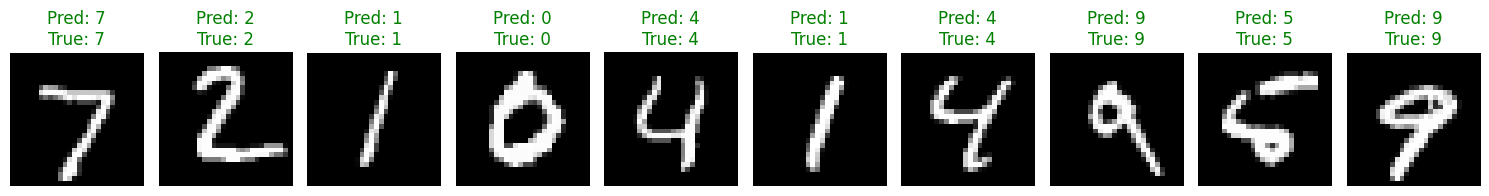

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize the data (scale pixel values to [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Build a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 28x28 images to 784-dim vectors
    Dense(128, activation='relu'),       # Hidden layer
    Dense(64, activation='relu'),        # Another hidden layer (optional)
    Dense(10, activation='softmax')      # Output layer for 10 classes
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest accuracy: {test_acc:.4f}")

# 8. Make predictions
predictions = model.predict(x_test)

# 9. Visualize some predictions
def plot_predictions(images, labels, predictions, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i], cmap='gray')
        pred_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show 10 predictions
plot_predictions(x_test, y_test, predictions, num=10)


#Test_code_1

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img = Image.open("/content/drive/MyDrive/ICE-4206 Neural Network Sessional/0.jpg").convert("L")  # Grayscale
img = img.resize((28, 28))               # Resize to MNIST dimensions
img = 255 - np.array(img)                # Invert colors: white digit on black background
img = img / 255.0                        # Normalize to [0, 1]
img = img.reshape(1, 28, 28)             # Reshape for the model input

# Predict using the trained model
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Display the image and prediction
plt.imshow(img.reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()


NameError: name 'model' is not defined

#lab02

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

# Create directory if not exists
if not os.path.exists("generated_images"):
    os.makedirs("generated_images")

# Load MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# Hyperparameters
latent_dim = 100
batch_size = 64
epochs = 20000
save_interval = 5000

# Generator Model
def build_generator():
    model = keras.Sequential([
        keras.layers.Dense(256, input_dim=latent_dim),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(512),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1024),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(28 * 28 * 1, activation="tanh"),
        keras.layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator Model
def build_discriminator():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),

        keras.layers.Dense(512),
        keras.layers.LeakyReLU(negative_slope=0.2),

        keras.layers.Dense(256),
        keras.layers.LeakyReLU(negative_slope=0.2),

        keras.layers.Dense(1, activation="sigmoid")
    ])
    return model

# Build GAN
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Combine into GAN
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Function to save generated images
def save_images(epoch):
    noise = np.random.normal(0, 1, (16, latent_dim))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0,1]

    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(gen_images[i, :, :, 0], cmap='gray')
        ax.axis('off')

    plt.savefig(f"generated_images/epoch_{epoch}.png")
    plt.close()

# Training Loop
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator(noise, training=False)

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f} | D accuracy: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

    if epoch % save_interval == 0:
        save_images(epoch)

print("GAN Training Complete!")


Epoch 0 [D loss: 0.9541 | D accuracy: 20.31%] [G loss: 0.8062]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Epoch 1000 [D loss: 3.2041 | D accuracy: 3.26%] [G loss: 0.0223]
Epoch 2000 [D loss: 3.7344 | D accuracy: 3.07%] [G loss: 0.0115]
Epoch 3000 [D loss: 4.0468 | D accuracy: 3.02%] [G loss: 0.0077]
Epoch 4000 [D loss: 4.2788 | D accuracy: 3.01%] [G loss: 0.0058]
Epoch 5000 [D loss: 4.4676 | D accuracy: 2.98%] [G loss: 0.0047]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Epoch 6000 [D loss: 4.6298 | D accuracy: 2.97%] [G loss: 0.0039]
Epoch 7000 [D loss: 4.7748 | D accuracy: 2.97%] [G loss: 0.0034]
Epoch 8000 [D loss: 4.9086 | D accuracy: 2.98%] [G loss: 0.0029]
Epoch 9000 [D loss: 5.0335 | D accuracy: 2.98%] [G loss: 0.0026]
Epoch 10000 [D loss: 5.1530 | D accuracy: 2.98%] [G loss: 0.0024]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Epoch 11000 [D loss: 5.2698 | D accuracy: 2.98%] [G loss: 0.0021]
Epoch 12000 [D loss: 5.3844 | D accuracy: 2.98%] [G loss: 0.0020]
Epoch 13000 [D loss: 5.4983 | D accuracy

#Lab02

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1,1]
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension

# Hyperparameters
latent_dim = 100
batch_size = 128
epochs = 10000

# Generator Model
def build_generator():
    model = keras.Sequential([
        keras.layers.Dense(256, input_dim=latent_dim),
        keras.layers.LeakyReLU(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512),
        keras.layers.LeakyReLU(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1024),
        keras.layers.LeakyReLU(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(28 * 28 * 1, activation="tanh"),
        keras.layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator Model
def build_discriminator():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(512),
        keras.layers.LeakyReLU(0.2),
        keras.layers.Dense(256),
        keras.layers.LeakyReLU(0.2),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    return model

# Build GAN
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Combine into GAN
discriminator.trainable = False  # Freeze discriminator for combined training
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Training Loop
for epoch in range(epochs):
    # Select a random batch of real images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator(noise, training=True)

    # Train Discriminator
    discriminator.trainable = True
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator (Discriminator frozen)
    discriminator.trainable = False
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

print("GAN Training Complete!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0 [D loss: 0.6494896411895752 | D accuracy: 61.13%] [G loss: 0.9572]
1000 [D loss: 0.4746891260147095 | D accuracy: 71.19%] [G loss: 1.7796]
2000 [D loss: 0.5194272994995117 | D accuracy: 72.28%] [G loss: 1.4406]
3000 [D loss: 0.5431253910064697 | D accuracy: 71.59%] [G loss: 1.2848]
4000 [D loss: 0.560620903968811 | D accuracy: 70.78%] [G loss: 1.1912]
5000 [D loss: 0.5762349367141724 | D accuracy: 69.51%] [G loss: 1.1289]
6000 [D loss: 0.5887190103530884 | D accuracy: 68.27%] [G loss: 1.0848]
7000 [D loss: 0.5984693169593811 | D accuracy: 67.23%] [G loss: 1.0525]
8000 [D loss: 0.6064258813858032 | D accuracy: 66.34%] [G loss: 1.0277]
9000 [D loss: 0.6129634976387024 | D accuracy: 65.56%] [G loss: 1.0078]
GAN Training Complete!


03

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.3562 - loss: 1.7358 - val_accuracy: 0.5226 - val_loss: 1.3238
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5799 - loss: 1.1862 - val_accuracy: 0.6225 - val_loss: 1.0563
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6542 - loss: 0.9923 - val_accuracy: 0.6468 - val_loss: 1.0032
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6895 - loss: 0.8833 - val_accuracy: 0.6729 - val_loss: 0.9295
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7168 - loss: 0.8012 - val_accuracy: 0.6909 - val_loss: 0.8915
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7423 - loss: 0.7313 - val_accuracy: 0.6983 - val_loss: 0.8700
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.7605 - loss: 0.6809 - val_accuracy: 0.7113 - val_loss: 0.8387
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7785 -

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(



Test accuracy: 0.9757857142857143


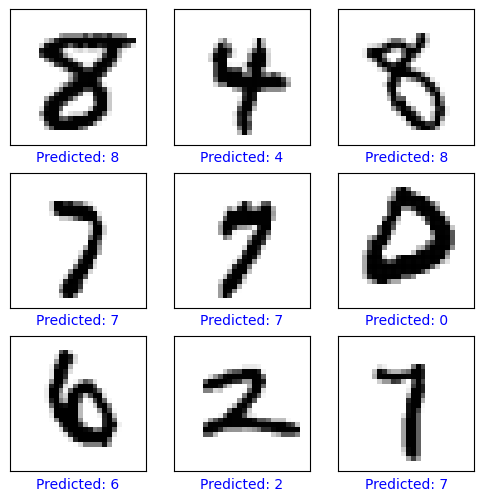

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_test and y_test to NumPy arrays to avoid indexing issues
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Initialize and train the neural network model
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=20, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy: {accuracy}')

# Function to plot image and prediction
def plot_image(i, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {y_pred[i]}", color='blue')

# Display sample predictions
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_test[i], X_test[i])
plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1️⃣ Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# CNN expects 4D input: (samples, height, width, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

# 2️⃣ Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3️⃣ Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4️⃣ Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 5️⃣ Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n🎯 Test accuracy: {test_acc:.4f}")
model.save('mnist_cnn_model.h5')  # .h5 ফরম্যাটে সেভ



Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.8736 - loss: 0.4223 - val_accuracy: 0.9835 - val_loss: 0.0577
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9814 - loss: 0.0617 - val_accuracy: 0.9903 - val_loss: 0.0376
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9887 - val_loss: 0.0395
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9913 - val_loss: 0.0330
313/313 - 2s - 8ms/step - accuracy: 0.9906 - loss: 0.0278



🎯 Test accuracy: 0.9906
